<a href="https://colab.research.google.com/github/aayushkubb/nlp/blob/main/QUORA_Class_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK for next week

Students need to improve the f1-score. This can be done by trying to

Lemmatize
Stemming

Hashing Vectors
Vount Vectors

Standardisation

etc..

# Mount the drive

Please make sure the below folder is added to your drive

https://drive.google.com/drive/folders/1wcwKLy8SFu4iugPhzJNovpwvzyIQPP_D?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Problem Definition
---
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( Problem Formalization)

> We will be predicting whether a question asked on Quora is sincere or not

Data Source : https://www.kaggle.com/c/quora-insincere-questions-classification/data

**About Quora**

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

**Business View**

An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

**What is a insincere question?**

Is defined as a question intended to make a statement rather than look for helpful answers.

<img src="https://drive.google.com/uc?id=1XOvVoEDjNF_p2tHV1H9XzoZHxfzBBA5t"/>

**Feature Set**

We use train.csv and test.csv as Input and we should upload a submission.csv as Output.

The training set contains the following 3 features (for Supervised Learning)
1. qid - unique question identifier
2. question_text - Quora question text
3. target - a question labeled "insincere" has a value of 1, otherwise 0

In [2]:
!pip install nltk


# Import Statements

In [3]:
import pandas as pd
import numpy as np
import nltk
import re


from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import classification_report
# nltk.download('all')

# Read the datasets

In [4]:
train=pd.read_csv('/content/drive/MyDrive/Quora/QuoratrainSet.csv')
test=pd.read_csv('/content/drive/MyDrive/Quora/Quoratestdata.csv')

In [5]:
train.shape, test.shape

((1048575, 3), (375806, 2))

In [6]:
#Just for the class we will sample
train=train.sample(frac=.01)
test=test.sample(frac=.01)

In [8]:
train.head()

,qid,question_text,target
814839,9fa7b74afe131c68fc5c,How did the Mexico rebuild?,0
453987,58efc099dda1a3fa17fa,What does domineering power mean?,0
440599,56586b624228c3464b2f,How are fractions used by carpenters?,0
478896,5dc779afc2dd9b15782e,"Are there any real countries, where the people...",0
143311,1c0a59c57e535d630609,Why do people use Rubbermaid storage totes?,0


In [9]:
test.head()

,qid,question_text
226392,9a088fdd757694358516,Why are people so disrespectful with their res...
345512,eb7679a2dab7ee487fc1,It is still not showing the solutions?
371437,fd1d8b39778ca59e859e,Who is the best criminal defense attorney in S...
222181,97299823ebce65d4bc90,Can you suggest some web based projects that I...
242469,a4f94c8d8e64a351394b,Who is the most inspiring character in an anim...


In [10]:
train['target'].value_counts(normalize=True)

,proportion
target,
0,0.935152
1,0.064848


# Approach



1.   Try to understand the data a bit.
    *   Patterns - NGRAMs
    *   EDA - WORDCLOUD

2. Success Criteria - F1 score  
3. Baseline Approach
4. Clean the data
      *   Lowercase
      *   Tokeniser
      *   Remove Stopwords
      *   Remove non-apha text
      *   Lemmatisation/Stemming

5. Prepare the data for training
      *   Word to numeric features - Count and TFIDF
      *   Standardize these features

6. Build our model
7. Evaluate and Repeat of required






In [11]:
def ngram_finder(tokens):
  bigrams = nltk.collocations.BigramAssocMeasures()
  bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)

  #bigrams
  bigram_freq = bigramFinder.ngram_fd.items()
  bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)



  trigrams = nltk.collocations.TrigramAssocMeasures()
  trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

  #trigrams
  trigram_freq = trigramFinder.ngram_fd.items()
  trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)


  return bigramFreqTable,trigramFreqTable


# Basic Data Cleaning

In [12]:
characters=[]
for i in train['question_text'].tolist():
  for j in i.split():
    for k in j:
      characters.append(k)

In [13]:
re.sub('[^a-z ]',"","hey this, is me 123 ?")

'hey this is me  '

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
#STopwords
Stopwords = set(stopwords.words('english'))
Stopwords.add("a")


def data_cleaner(row):

  '''Cleaner utility for text'''

  #lowercasing
  row=row.lower()
  # print(row)

  #Remove anything apart from alphabets
  row=re.sub('[^a-z ]',"",row)
  # print(row)

  #Strip
  row=row.strip()
  # print(row)

  #Lets remove stopwords
  row=" ".join([i for i in row.split() if i not in Stopwords])
  # print(row)
  return row





In [17]:
train['question_text']=train['question_text'].apply(data_cleaner)

In [18]:
train=train[train['question_text'].apply(lambda x: len(x.split())>=2)]

In [20]:
nltk.download('punkt_tab')
# Tokeniser
tokens=[]
for i in train.loc[train['target']==1,'question_text']:
  tokens.extend(nltk.word_tokenize(i.lower()))

for i in tokens:
  if i in Stopwords:
    tokens.remove(i)
bigramFreqTable,trigramFreqTable=ngram_finder(tokens)
bigramFreqTable

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,bigram,freq
83,"(donald, trump)",9
799,"(united, states)",6
383,"(white, people)",6
248,"(dont, like)",5
110,"(black, people)",5
...,...,...
2000,"(instead, kannada)",1
1999,"(guys, instead)",1
1998,"(indian, guys)",1
1997,"(prefer, north)",1


In [21]:
# Tokeniser
tokens=[]
for i in train.loc[train['target']==0,'question_text']:
  tokens.extend(nltk.word_tokenize(i.lower()))

for i in tokens:
  if i in Stopwords:
    tokens.remove(i)
bigramFreqTable,trigramFreqTable=ngram_finder(tokens)
bigramFreqTable

,bigram,freq
1024,"(best, way)",56
243,"(year, old)",40
166,"(would, happen)",37
7351,"(united, states)",29
98,"(high, school)",29
...,...,...
19602,"(mean, tally)",1
19603,"(tally, features)",1
19604,"(features, best)",1
19605,"(best, distributed)",1


In [22]:
train['length_sentence']=train['question_text'].apply(lambda x: len(x.split()))

In [23]:
train.groupby(by='target').describe()

length_sentence                                               
                 count      mean       std  min  25%  50%   75%   max
target                                                               
0               9746.0  6.199056  3.412136  2.0  4.0  5.0   8.0  28.0
1                677.0  8.937962  4.913963  2.0  5.0  8.0  11.0  28.0

# Baseline Model

In [24]:
train['predictions_baseline']=train['length_sentence'].apply(lambda x: 1 if x>13 else 0)

In [25]:
print(classification_report(train['target'],train['predictions_baseline']))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9746
           1       0.20      0.15      0.17       677

    accuracy                           0.91     10423
   macro avg       0.57      0.56      0.56     10423
weighted avg       0.89      0.91      0.90     10423



In [26]:
#lets check on the test set
test['question_text']=test['question_text'].apply(data_cleaner)
test['length_sentence']=test['question_text'].apply(lambda x: len(x.split()))
test['predictions_baseline']=test['length_sentence'].apply(lambda x: 1 if x>13 else 0)
test.loc[test['predictions_baseline']==1,'question_text'].tolist()

['appropriate sell books footpaths though pedestrians stampede books legs generate dust spread across footpaths',
 'cant love real people get fictional crushes loved real person chance got rejected shrugged',
 'united states stop country everyone around globe admired wanted move process start vietnam war',
 'performing mental evaluations candidates president vice president would make law could avoid future disasters like one anyone think trump pence could pass mental examination',
 'assume topological group g admit metric left invariant compatible topology g g necessarily lie group',
 'possible get skinny cardio without building noticeable muscles want loose weight time build big muscles',
 'book prefer physics class th jee preparation following books pradeep sl arora hc verma',
 'girls always make sure husband earns least equal earnings confuse guy ask leave job',
 'lot people write answers makes others feel sad sick emotional outlet tactic get upvotes reason started feeling despresse

# Visualisation

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

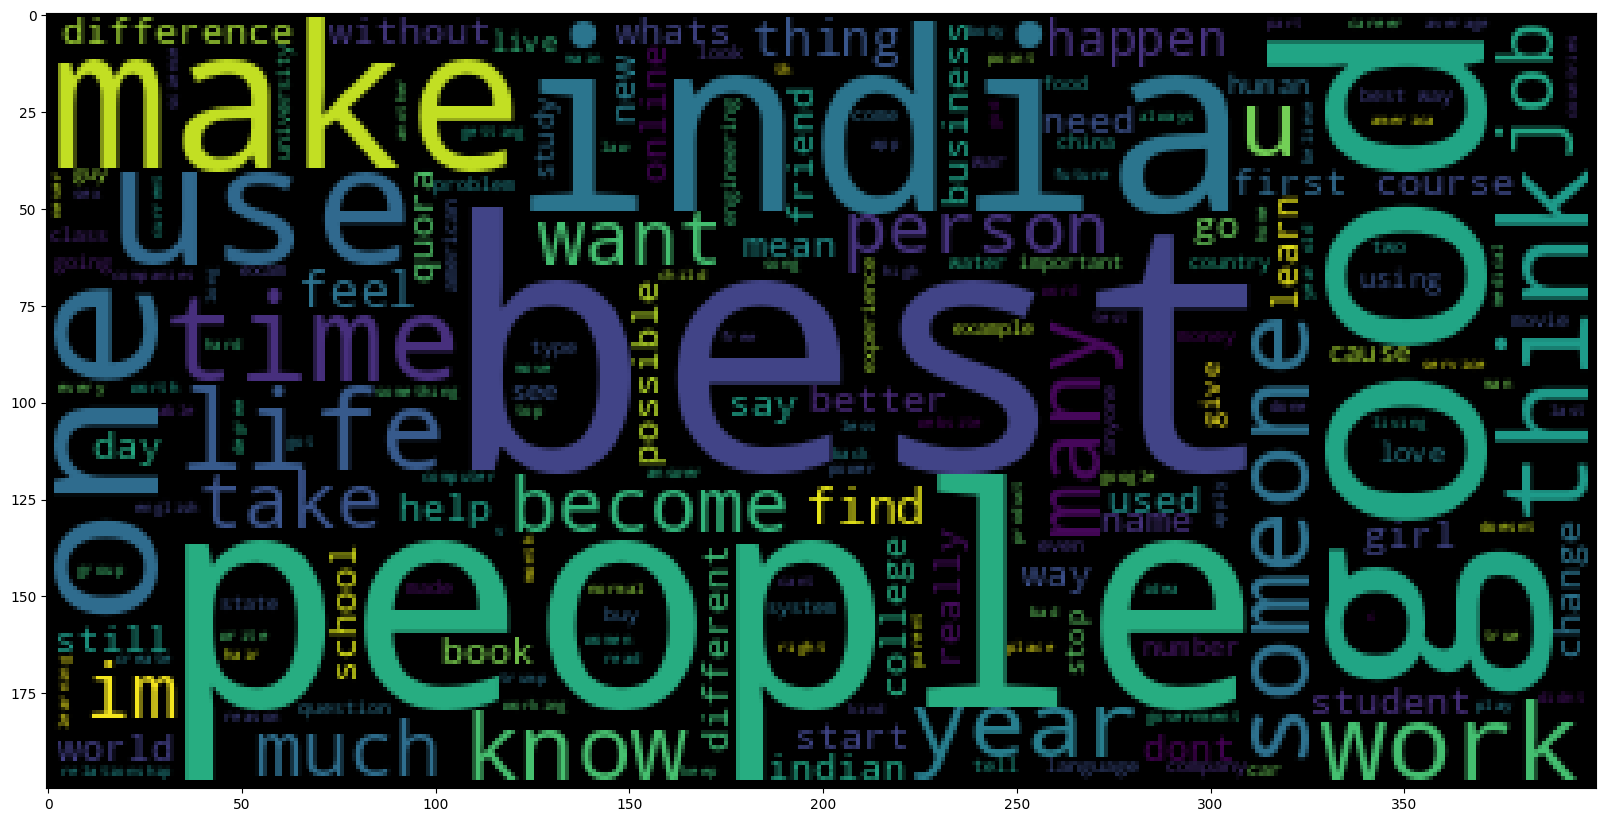

In [28]:
# Sincere
wc=WordCloud().generate(" ".join(train.loc[train['target']==0,'question_text'].tolist()))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wc)
plt.show()

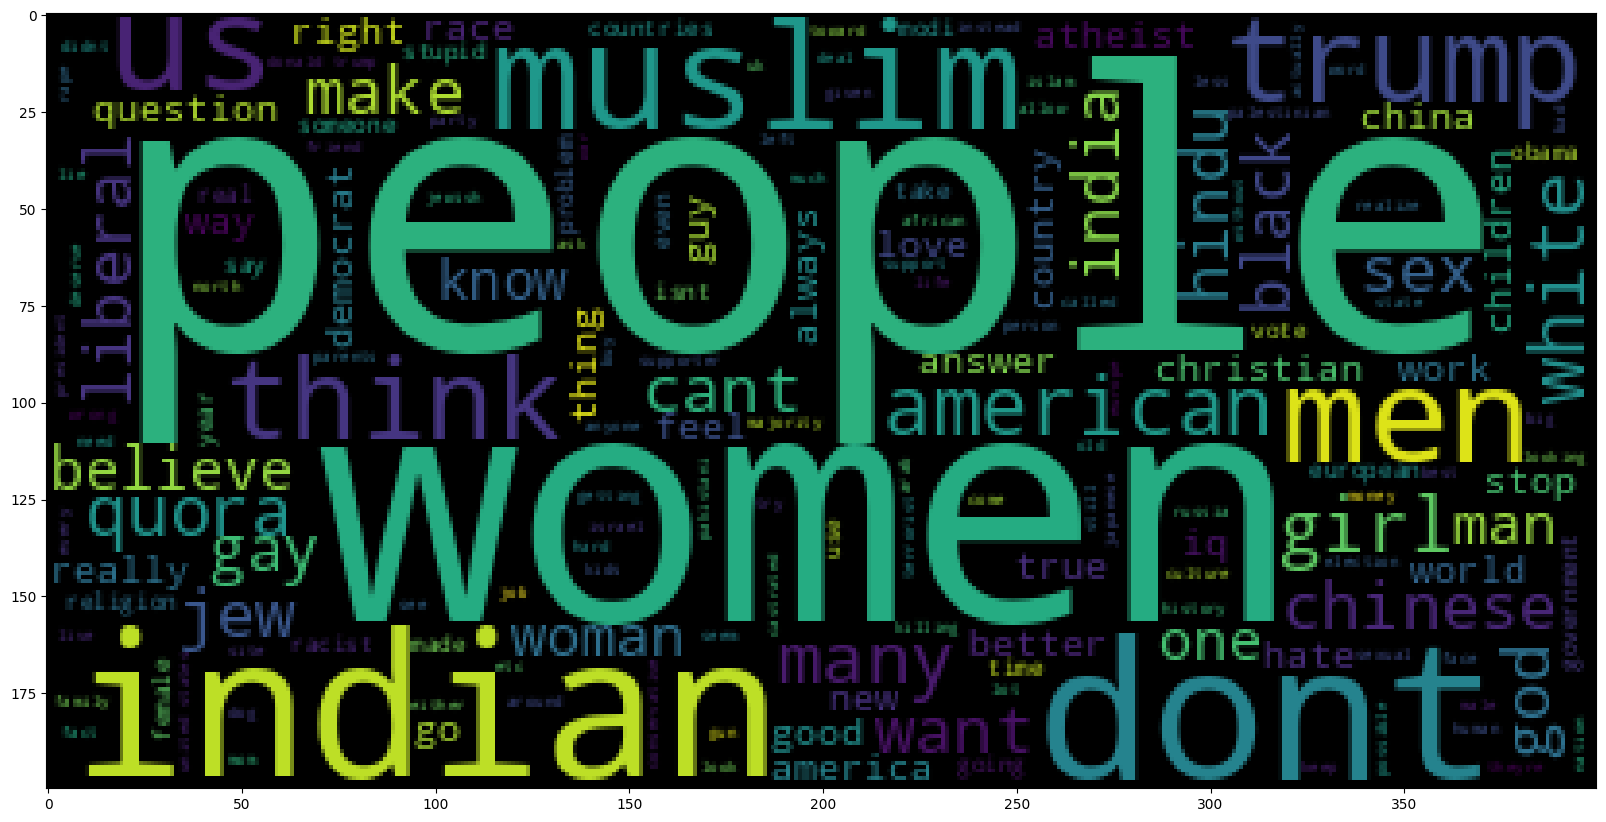

In [29]:
# InSincere
wc=WordCloud().generate(" ".join(train.loc[train['target']==1,'question_text'].tolist()))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wc)
plt.show()

# Baseline Model- 2

In [30]:
def baseline_Classifier(text):
  if 'trump' in text or 'muslim' in text or 'black' in text or 'american' in text or 'indian' in text or 'gun' in text or 'sex' in text:
    return 1
  else:
    return 0

In [31]:
train['predictions_baseline2']=train['question_text'].apply(baseline_Classifier)
print(classification_report(train['target'],train['predictions_baseline2']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9746
           1       0.35      0.31      0.33       677

    accuracy                           0.92     10423
   macro avg       0.65      0.64      0.64     10423
weighted avg       0.91      0.92      0.92     10423



# Data prep

In [32]:
#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(train['question_text'])

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'mexico': 8683, 'rebuild': 11339, 'domineering': 4097, 'power': 10635, 'mean': 8520, 'fractions': 5390, 'used': 14545, 'carpenters': 2081, 'real': 11308, 'countries': 3142, 'people': 10187, 'charge': 2277, 'instead': 6968, 'wealthy': 14968, 'use': 14544, 'rubbermaid': 11935, 'storage': 13165, 'totes': 14028, 'hollywood': 6366, 'really': 11316, 'haunted': 6135, 'want': 14896, 'access': 78, 'account': 102, 'anywhere': 691, 'internet': 7032, 'like': 7955, 'dislike': 3971, 'barack': 1207, 'obama': 9577, 'good': 5773, 'free': 5418, 'voice': 14826, 'chat': 2299, 'service': 12370, 'baby': 1105, 'agi': 333, 'learning': 7822, 'speak': 12896, 'moment': 8932, 'inertia': 6855, 'calculated': 1955, 'black': 1523, 'hole': 6360, 'say': 12100, 'start': 13066, 'studying': 13255, 'th': 13784, 'beginning': 1334, 'get': 5670, 'marks': 8392, 'true': 14207, 'last': 7743, 'months': 8969, 'enough': 4588, 'purge': 11055, 'food': 5310, 'poisoning': 10495, 'alcohol': 403, 'pour': 10629, 'hot': 6439, 'water': 149

In [33]:
sample_text=train['question_text'].tolist()[0]
print(sample_text)

mexico rebuild


In [34]:
vectorizer.transform([sample_text]).toarray().shape

(1, 15400)

In [35]:
vectorizer.transform(["The fox"]).toarray().shape

(1, 15400)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Target and predictors
X=train['question_text']
y=train['target']

In [38]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
X_train.shape,X_test.shape

((7296,), (3127,))

In [40]:
X_train_vectors=vectorizer.transform(X_train)
X_test_vectors=vectorizer.transform(X_test)

In [41]:
X_test_vectors.toarray().shape

(3127, 15400)

# Models

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()



In [43]:
rf.fit(X_train_vectors,y_train)

RandomForestClassifier()

In [44]:
#Predictions
y_pred=rf.predict(X_test_vectors)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2906
           1       0.54      0.03      0.06       221

    accuracy                           0.93      3127
   macro avg       0.73      0.51      0.51      3127
weighted avg       0.90      0.93      0.90      3127



## SVM

In [46]:
from sklearn import svm
SVM=svm.SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
SVM.fit(X_train_vectors,y_train)
#Predictions
y_pred=SVM.predict(X_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2906
           1       0.74      0.09      0.16       221

    accuracy                           0.93      3127
   macro avg       0.84      0.54      0.56      3127
weighted avg       0.92      0.93      0.91      3127



In [47]:
y_pred_prob=rf.predict_proba(X_test_vectors)

In [48]:
y_pred_prob[10]

array([0.8, 0.2])

In [49]:
y_pred=[]
for i in y_pred_prob:
  if i[1] >0.1:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2906
           1       0.31      0.58      0.41       221

    accuracy                           0.88      3127
   macro avg       0.64      0.74      0.67      3127
weighted avg       0.92      0.88      0.90      3127

